## Датасет содержит информацию о  поведении потребителей в ритейле. Он содержит социально-демографические признаки, детали заказа и лояльность.

### Цель исследования-  используя датасет проанализировать потребительское поведения для выявления ключевых факторов, влияющих на объем продаж и лояльность клиентов.

In [116]:
# импортируем нужные библиотеки для работы с числами, данными и их визуального представления
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
# загружаем датасет и задаем опцию полного показа столбцов
df = pd.read_csv('shopping_behavior_updated.csv')
pd.set_option('display.max_columns', None)

In [118]:
# смортим первые пять данных
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [119]:
# смортим последние пять данных
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [120]:
# смортим размер датасета
df.shape

(3900, 18)

In [79]:
# получаем подробный анализ датасета тип колонок , пропуски и используемый память
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [80]:
# еще раз проверям пропуски так как они серьезно могут мешать на работе
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [81]:
# рассмотрим числовую статистику для полного понимания конструкции датасета
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# EDA

# в этой части рассмотрим связи столбцов для выявления закономерностей

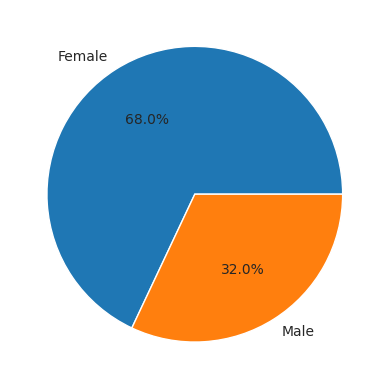

In [99]:
plt.pie(df['Gender'].value_counts() ,labels=('Female', 'Male'), data=df , autopct='%1.1f%%')
plt.show()

 выясняется что большинство покупателей у нас женского пола

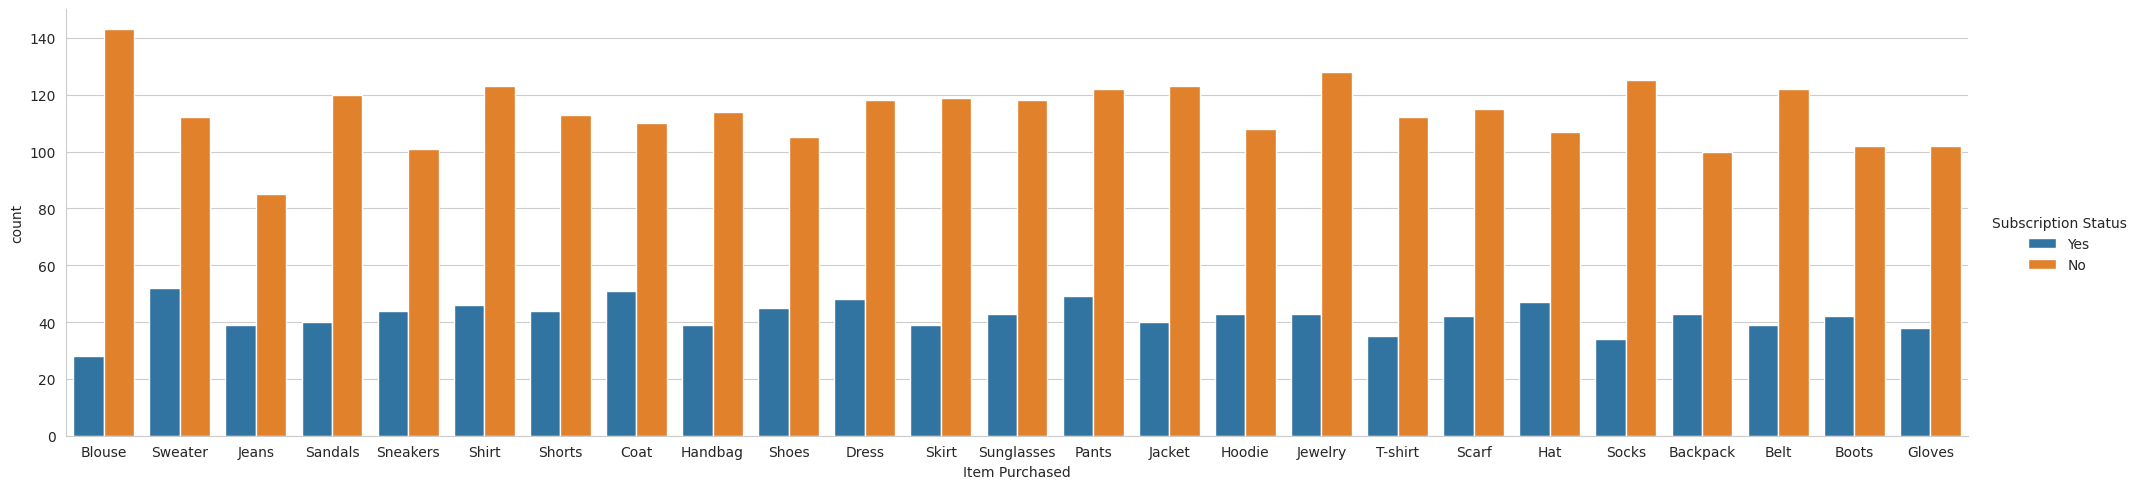

In [140]:
sns.catplot(x='Item Purchased', data=df, kind='count' , aspect=4, hue='Subscription Status')
plt.show()

больше всего покупателей с активным статусом подписки приобрели Свитера и Пальто а у другие Блузки Футболки и Шорты .

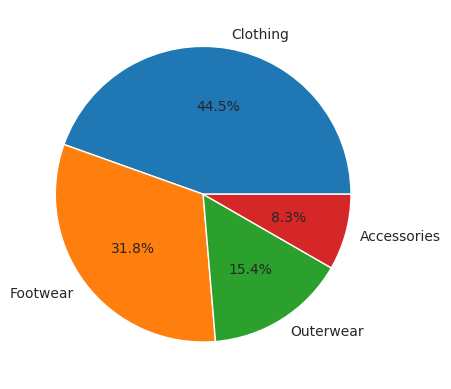

In [146]:
plt.pie(df['Category'].value_counts() ,labels=('Clothing', 'Footwear', 'Outerwear', 'Accessories'), data=df , autopct='%1.1f%%')
plt.show()

основная часть продаж призодится на одежду и на обувь- больше 75%

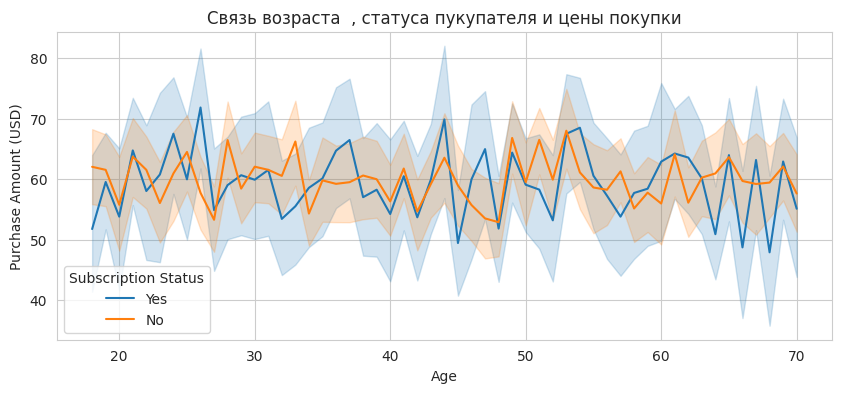

In [133]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Age', y='Purchase Amount (USD)', data=df , hue='Subscription Status')
plt.title('Связь возраста  , статуса пукупателя и цены покупки')
plt.show()

исходя из результатов мы видим чо  боьше всего тратятся люди среднего возраста с активным статусом подписки

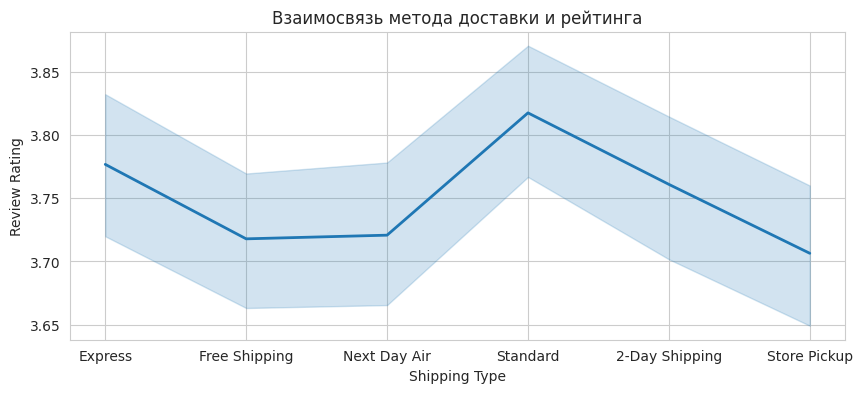

In [132]:
plt.figure(figsize=(10, 4))
sns.lineplot(y='Review Rating', x='Shipping Type', data=df, linewidth=2)
plt.title('Взаимосвязь метода доставки и рейтинга')
plt.show()

исходя из данных видим что в=стандартный вид доставки приносит больший рейтинг




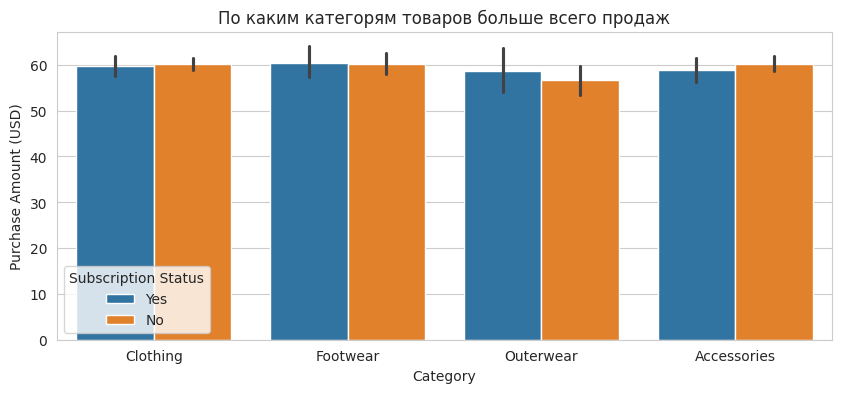

In [135]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df , hue='Subscription Status')
plt.title('По каким категорям товаров больше всего продаж')
plt.show()

 все виды товаров приносят почти одинаковую прибыль

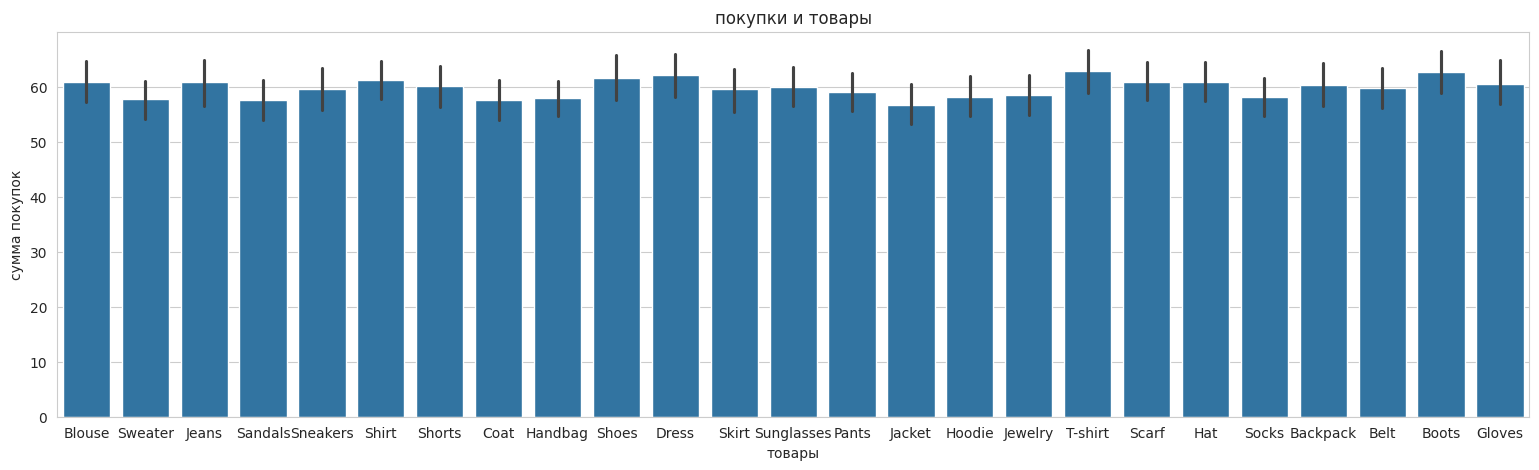

In [167]:
# столбчадая диаграмма для анализа связи товара и прибыли
plt.figure(figsize=(19,5))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=df)
plt.xlabel('товары')
plt.ylabel('сумма покупок')
plt.title('покупки и товары')
plt.show()

тут примерно такая же ситуация как и с категориями все виды товаров приносят почти равную прибыль и только Шорты и Платья немного отличаются в лучшую сторону

и также проанализируем взаимосвязь использования промокодов и их результат


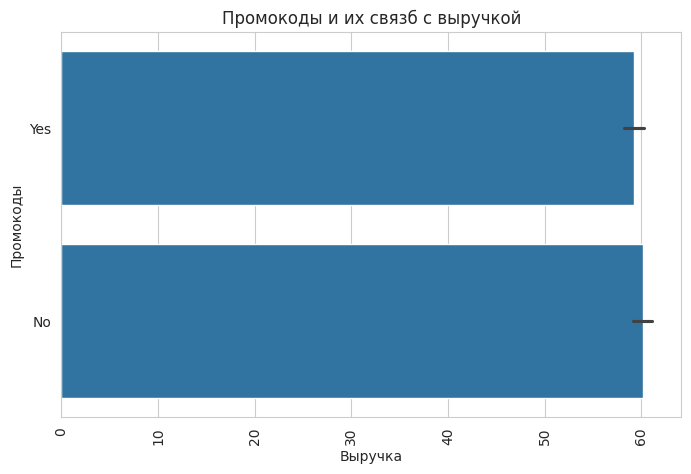

In [181]:
plt.figure(figsize=(8,5))
sns.barplot(y='Promo Code Used', x='Purchase Amount (USD)', data=df)
plt.xticks(rotation=90)
plt.title('Промокоды и их связб с выручкой')
plt.ylabel('Промокоды')
plt.xlabel('Выручка')
plt.show()

как результат мы видим что от людей без промокодов немного больше прибыли

Выводы мы отследили связь видов товара , достовки , использование промокодов ,связь возраста и гендера на покупки и приносимой ими прибыли .
Исходя из проделанной работы делаю вывод что люди среднего возраста без активной подписки и пользуюшиеся стандартным видом доставки приносят большую часть прибыли компании.